# Titanic Dataset Analysis🚢

## Import Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset 📂

In [2]:
titanic_data = pd.read_csv("titanic.csv")

### Inspect the Dataframe

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

## Checking and Handling Missing Values ⚠️

### Finding Missing Values

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Age Missing Values

In [6]:
titanic_data['Age_missing'] = titanic_data['Age'].isnull().astype(int) # so we would know which rows were missing !

titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median()) #filled the missing values with median.



### Handling Cabin Missing Values

In [7]:
titanic_data['Cabin_missing'] = titanic_data['Cabin'].isnull().astype(int) # so we would know which rows were missing !

titanic_data['Cabin'] = titanic_data['Cabin'].fillna("Unknown") #filled the missing values with Unkown.

# only keeping the first letter of Cabin  
titanic_data['Cabin'] = titanic_data['Cabin'].str[0]



### Handling Embarked missing values

In [8]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
# since only 2 values are missing , we filled it with most common Embarked

## Data Cleaning and Engineering 🔍

### Adding Extra Columns

In [9]:
# Adding FamilySize
titanic_data["FamilySize"] = titanic_data["SibSp"] + titanic_data["Parch"]

In [10]:
# Adding LifeStage
Real_Ages = titanic_data[titanic_data["Age_missing"] == 0] # Removed the age missing values that we filled with median earlier !

titanic_data['life_stage'] = pd.cut(Real_Ages['Age'],bins=[0, 18, 65, float('inf')],labels=['kids', 'adults', 'elderly'],right=True)

# filling life_stage missing values with median and creating a flag !

titanic_data['life_stage_missing'] = titanic_data['life_stage'].isnull().astype(int) # so we would know which rows were missing !

titanic_data['life_stage'] = titanic_data['life_stage'].fillna(titanic_data['life_stage'].mode()[0]) #filled the missing values with most common value.




In [11]:
# Adding First Name & Last Name
titanic_data["FirstName"] = titanic_data['Name'].str.split("," , expand=True)[0]

titanic_data["LastName"] = titanic_data['Name'].str.split("," , expand=True)[1]



In [12]:
# Adding decade of life

Real_Ages = titanic_data[titanic_data["Age_missing"] == 0] # Removed the age missing values that we filled with median earlier !

titanic_data.loc[Real_Ages.index, 'Age_Decade'] = (Real_Ages['Age'] // 10) * 10


# filling Age_Decade missing values with median and creating a flag !

titanic_data['Age_Decade_missing'] = titanic_data['Age_Decade'].isnull().astype(int) # so we would know which rows were missing !

titanic_data['Age_Decade'] = titanic_data['Age_Decade'].fillna(titanic_data['Age_Decade'].median())



### Checking The Data Frame After Changes

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 891 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            891 non-null    object  
 12  Age_missing         891 non-null    int64   
 13  Cabin_missing       891 non-null    int64   
 14  FamilySize          891 non-null    int64   
 15  life_stage          891 non-null    cate

## Exploratory Data Analysis (EDA) 📊

### 0. Checking The DataBase

In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 891 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            891 non-null    object  
 12  Age_missing         891 non-null    int64   
 13  Cabin_missing       891 non-null    int64   
 14  FamilySize          891 non-null    int64   
 15  life_stage          891 non-null    cate

### 1. Age Analysis

#### 1.0 Age inspect

Age std : 14.526497332334044
Mean Fare: 29.69911764705882
Min Age: 0.42
Max Fare: 80.0
79.58
Fare Median : 15.7417


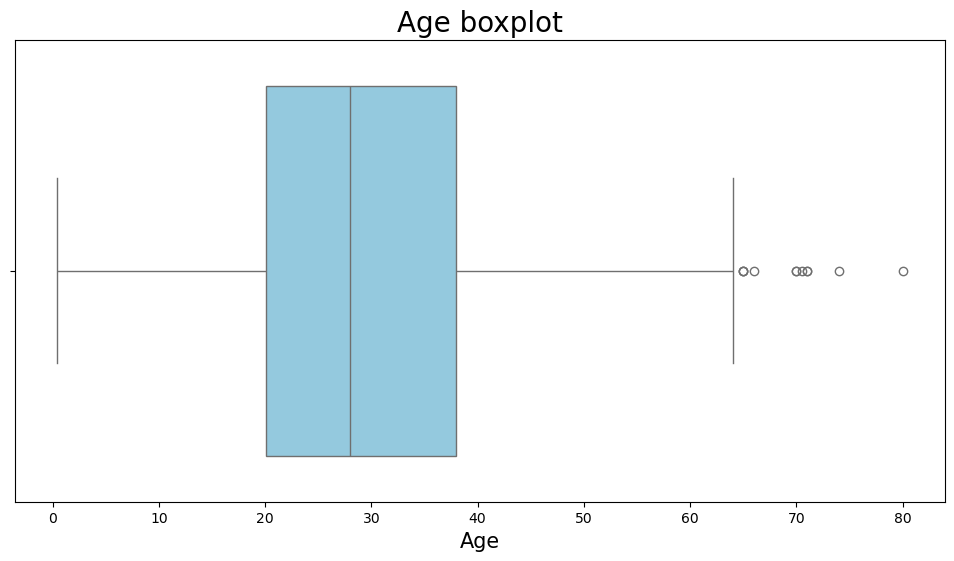

In [15]:
real_ages = titanic_data[titanic_data['Age_missing'] == 0] #removed those missing ages that were filled by median

# checking how spread our Age data is 
print("Age std :" , real_ages["Age"].std())

# checking mean Age 
print("Mean Fare:", real_ages['Age'].mean())

# finding min Fare
minage = real_ages['Age'].min()
print("Min Age:", minage)

# finding max Age
maxage = real_ages['Age'].max()
print("Max Fare:", maxage)

#finding Range of Age
print(maxage - minage)

# finding median of age
print("Fare Median :" , real_ages["Fare"].median())

#using boxplot for better inspect
plt.figure(figsize= (12,6))
ax = sns.boxplot(data = real_ages, x= real_ages["Age"] , color="skyblue")
ax.set_xlabel('Age',fontsize = 15)
ax.set_title('Age boxplot', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')
plt.show()




in this boxplot we can see most of the ages are around 0 to 65 . we can also see that the middle 50% of passengers are around 20 to 40. we also have some outliers from 65 up to 80.

#### 1.1 KDE of Age

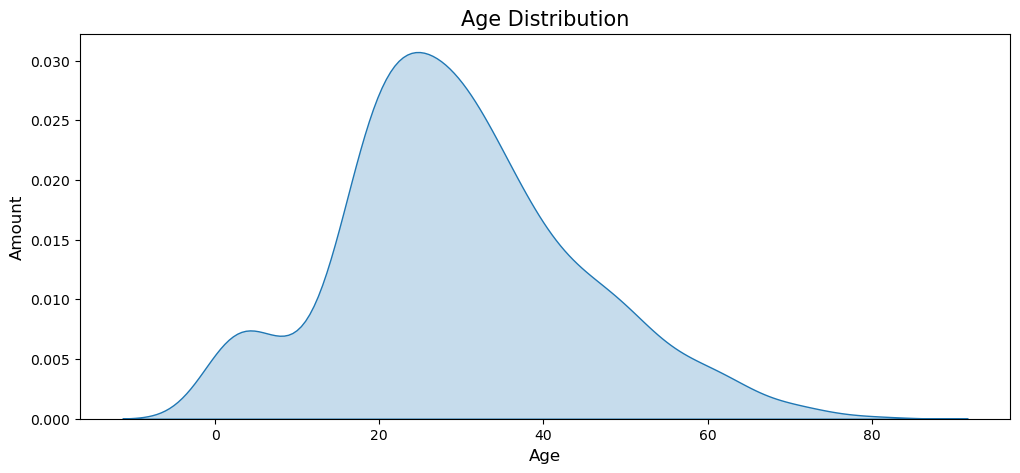

In [16]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=titanic_data[titanic_data["Age_missing"] == 0], x='Age', fill=True)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Age Distribution', fontsize=15)
plt.show()

in this KDEplot we can see our passengers ages start from 0 then slowly rise up till 15 , and from 15 to 23 there is a massive rise , reaching its peak around 23. after that there is a downfall till 40 , and from 40 to 80 there is even a more downfall. that makes our avg age somewhere around 20 to 40 (adults).

#### 1.2 Age x FamilySize

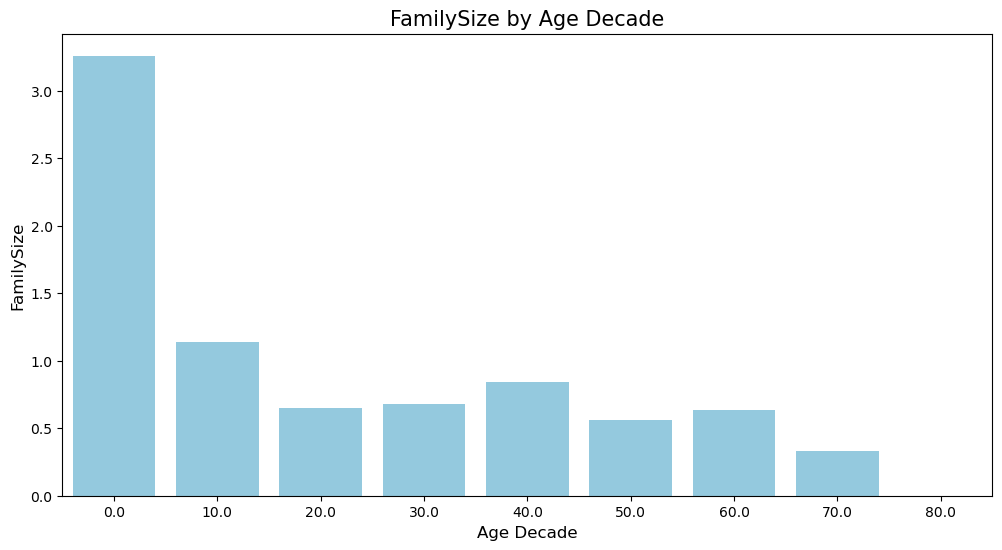

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=titanic_data, x='Age_Decade', y='FamilySize', color='skyblue' , errorbar=None)
plt.xlabel('Age Decade', fontsize=12)
plt.ylabel('FamilySize', fontsize=12)
plt.title('FamilySize by Age Decade', fontsize=15)
plt.show()

In this barplot, we can see that younger passengers (from 0 to 20) tended to travel with more family members.

#### 1.3 Age x Survival

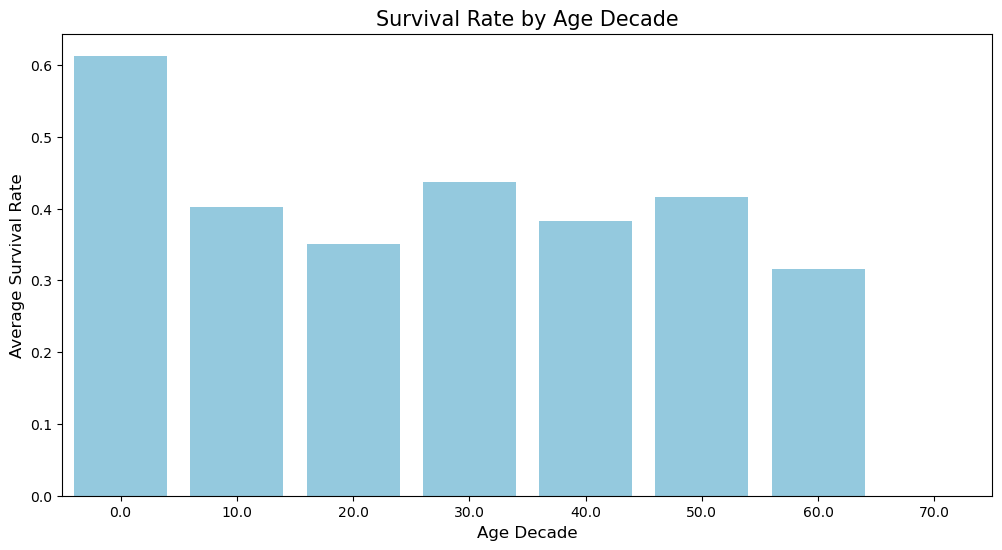

C:\Users\OverGame\AppData\Local\Temp\ipykernel_6652\1309315938.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  life_stage_survival = titanic_data.groupby('life_stage')['Survived'].mean().reset_index()


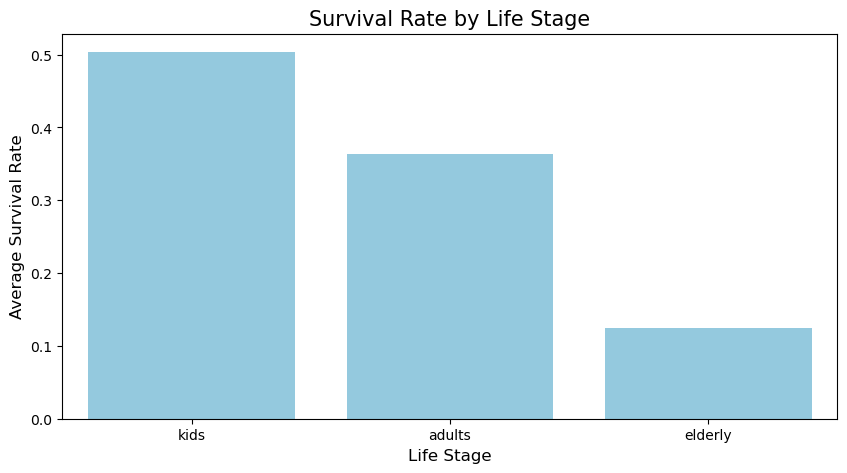

In [18]:

# checking survival by decade
Real_Decade = titanic_data[titanic_data["Age_Decade_missing"] == 0] # so we dont use Age_decades that were missing 
decade_counts = Real_Decade["Age_Decade"].value_counts() # check if we have a decade that doesn't have enough people to analyze
decade_filtered = decade_counts[decade_counts > 5].index # we remove those decades that have less than 5 people in it
filtered_data = Real_Decade[Real_Decade["Age_Decade"].isin(decade_filtered)] # so we only contain those which have more than 5 values !

age_decade_survival = filtered_data.groupby('Age_Decade')['Survived'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=age_decade_survival, x='Age_Decade', y='Survived', color='skyblue')
plt.xlabel('Age Decade', fontsize=12)
plt.ylabel('Average Survival Rate', fontsize=12)
plt.title('Survival Rate by Age Decade', fontsize=15)
plt.show()


# checking survuval by life stage
life_stage_survival = titanic_data.groupby('life_stage')['Survived'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=life_stage_survival, x='life_stage', y='Survived',color="skyblue" )
plt.xlabel('Life Stage', fontsize=12)
plt.ylabel('Average Survival Rate', fontsize=12)
plt.title('Survival Rate by Life Stage', fontsize=15)
plt.show()





in these barplots , we can see kids (0 to 10 years old) had the highest chance of survival. overall ,  the survival rate is like this : Kids > Adults > elderly 

#### 1.4 Age x Fare

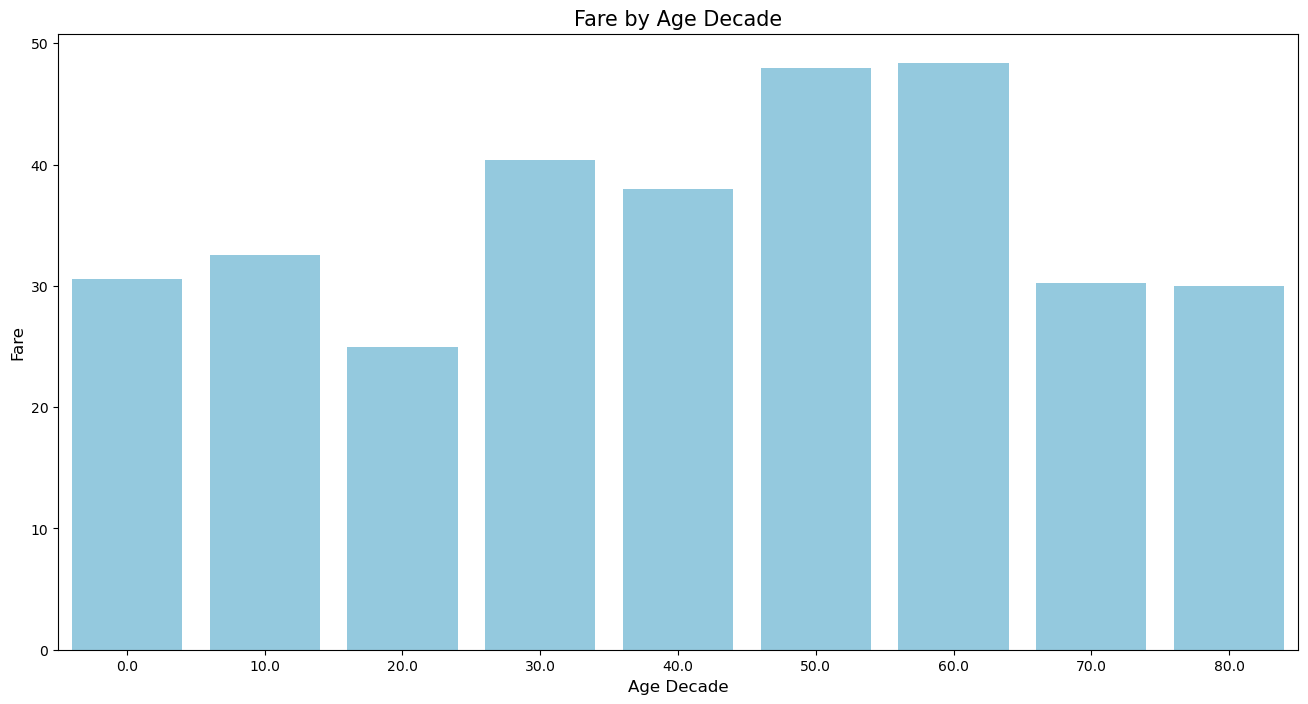

In [19]:
plt.figure(figsize=(16,8))
sns.barplot(data=titanic_data, x='Age_Decade', y='Fare', color='skyblue' , errorbar=None , width=0.8)
plt.xlabel('Age Decade', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.title('Fare by Age Decade', fontsize=15)
plt.show()

in this barplot we can see that people around 50 years old to 70 years old paid the highest fares

### 2. Sex Analysis 

#### 2.0 Sex inspect

In [20]:
# most common gender 
print("Mode:", titanic_data['Sex'].mode()[0])


# which gender survived more 
titanic_data.groupby('Sex')['Survived'].mean().sort_values(ascending=False).head(1)




Mode: male


Sex
female    0.742038
Name: Survived, dtype: float64

#### 2.1 Plot of Sex

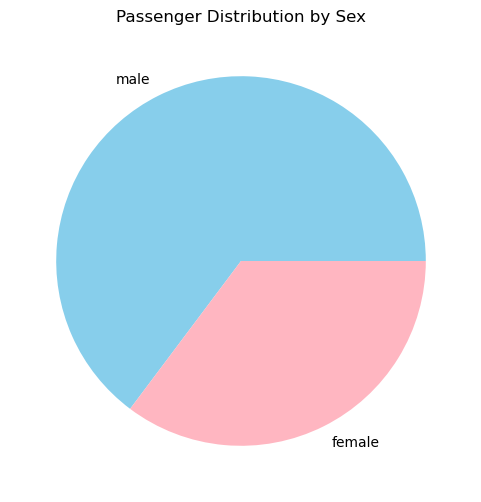

In [21]:
plt.figure(figsize=(6 , 6))
count = titanic_data['Sex'].value_counts()
plt.pie(count , labels=count.index, colors=['skyblue','lightpink'])
plt.title("Passenger Distribution by Sex")
plt.show()


in this pie chart , we can see male passengers were about 30% more than female passengers 

#### 2.2 Sex x Fare

C:\Users\OverGame\AppData\Local\Temp\ipykernel_6652\160445477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fare_by_sex, x='Sex', y='Fare', palette={"male":'skyblue',"female":'lightpink'})


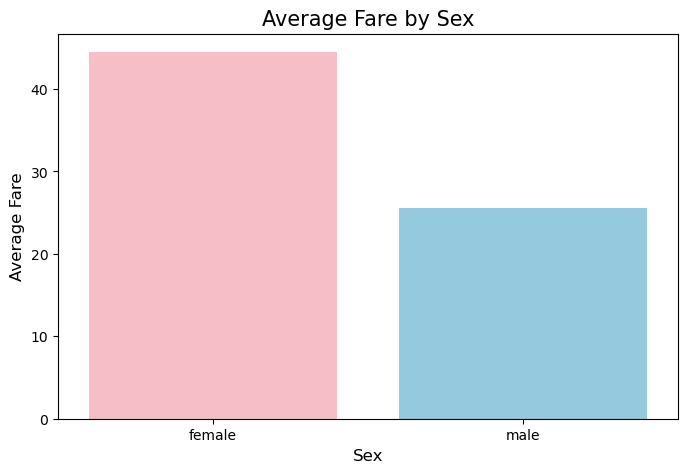

C:\Users\OverGame\AppData\Local\Temp\ipykernel_6652\160445477.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_data, x='Sex', y='Fare',palette={"male":"skyblue" , "female" : "lightpink" })


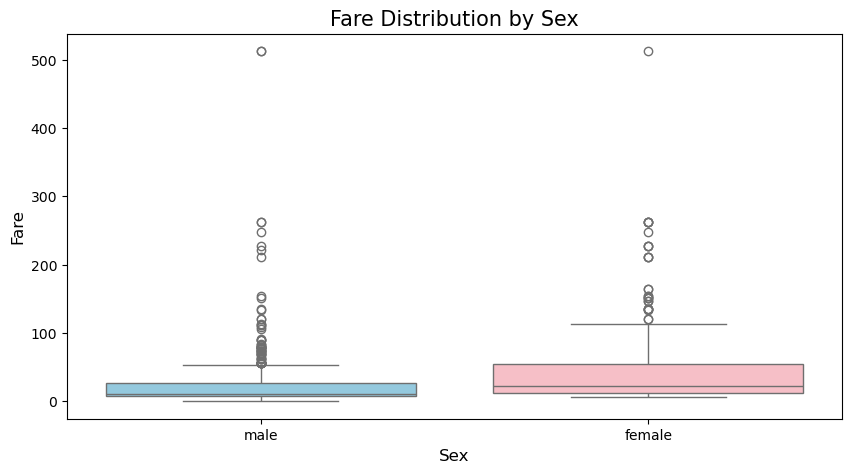

In [22]:

fare_by_sex = titanic_data.groupby('Sex')['Fare'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=fare_by_sex, x='Sex', y='Fare', palette={"male":'skyblue',"female":'lightpink'})
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)
plt.title('Average Fare by Sex', fontsize=15)
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(data=titanic_data, x='Sex', y='Fare',palette={"male":"skyblue" , "female" : "lightpink" })
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.title('Fare Distribution by Sex', fontsize=15)
plt.show()



In this boxplot we can see that male fares are mostly between $15 to $30 while female fares are between $20 to $50. The overall fare range for males is from around $2 to $75, where as for females it goes from $15 to $125.

We can also notice that there are some extremely high fares, which appear as outliers. The fun fact is there are 2 people , 1 male and 1 female with over 500 Fare! (we will see who they are in section 7 :"Fun Facts")

#### 2.3 Sex x Survival

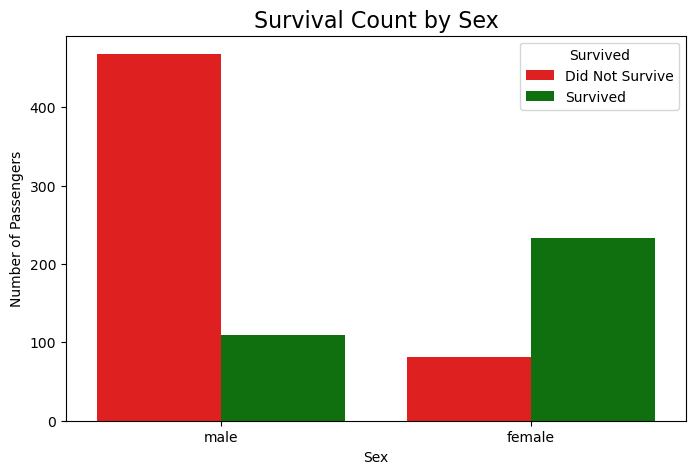

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette=['red','green'])
plt.title('Survival Count by Sex', fontsize=16)
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

in this count plot , we can clearly see that less than 20% of male survived , on the other hand females survived around 75% .

#### 2.4 Sex x Family on Board

C:\Users\OverGame\AppData\Local\Temp\ipykernel_6652\2000264963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic_data, x='Sex', y='FamilySize', errorbar=None , palette={"male":"skyblue" , "female" : "lightpink" } , width=0.3)


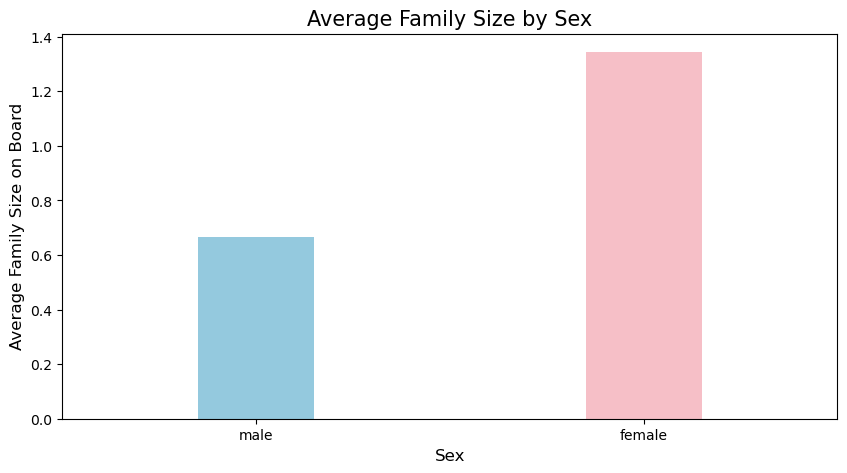

In [24]:

plt.figure(figsize=(10,5))
sns.barplot(data=titanic_data, x='Sex', y='FamilySize', errorbar=None , palette={"male":"skyblue" , "female" : "lightpink" } , width=0.3)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Family Size on Board', fontsize=12)
plt.title('Average Family Size by Sex', fontsize=15)
plt.show()


In this barplot, we can see that female passengers had nearly twice as many family members on board compared to male passengers.

#### 2.5 Sex x Class

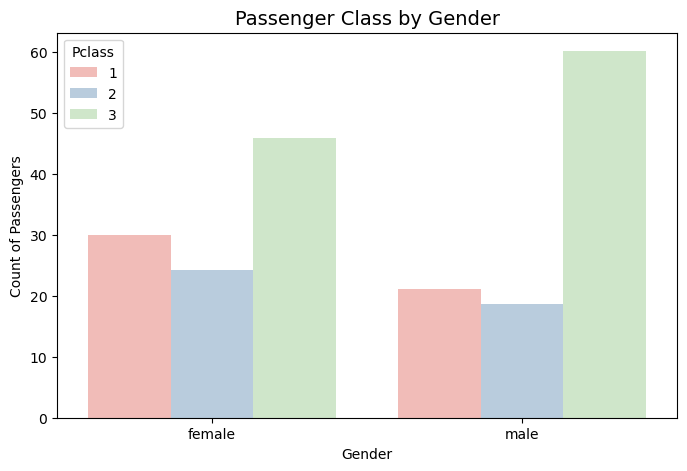

In [25]:
class_counts = titanic_data.groupby(['Sex','Pclass']).size().reset_index()
class_counts['Percent'] = class_counts.groupby('Sex')[0].transform(lambda x: x / x.sum() * 100) # to make percentage 



plt.figure(figsize=(8,5))
sns.barplot(data=class_counts, x = "Sex", y = 'Percent',hue='Pclass' , palette="Pastel1" )
plt.title("Passenger Class by Gender", fontsize=14 ) 
plt.xlabel("Gender")
plt.ylabel("Count of Passengers")
plt.show()


In this barplot, we can see that more females are in first and second class, and more males are in third class. So, females usually traveled in better classes.

### 3. Fare Analysis

#### 3.0 Fare Inspect

49.693428597180905
Mean Fare: 32.204207968574636
Min Fare: 0.0
Max Fare: 512.3292
Mode: 8.05
Fare Median : 14.4542


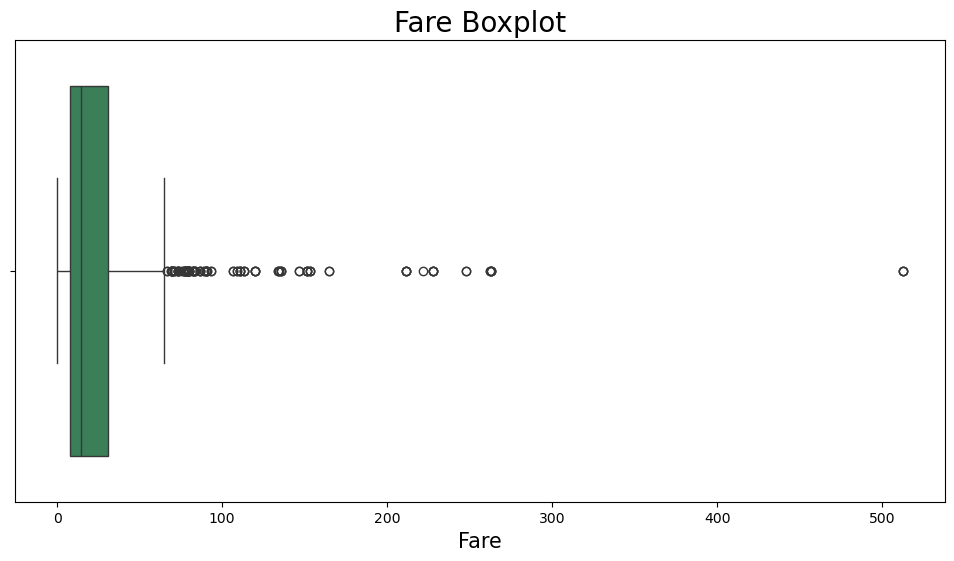

In [26]:
# checking how spread our fare data is 
print(titanic_data["Fare"].std())

# checking mean Fare 
print("Mean Fare:", titanic_data['Fare'].mean())

# finding min Fare
print("Min Fare:", titanic_data['Fare'].min())

# finding max fare
print("Max Fare:", titanic_data['Fare'].max())

# most common fare 
print("Mode:", titanic_data['Fare'].mode()[0])

# finding median
print("Fare Median :" , titanic_data["Fare"].median())

#using boxplot for better inspect
plt.figure(figsize= (12,6))
ax = sns.boxplot(data = titanic_data, x= titanic_data["Fare"] , color="seagreen")
ax.set_xlabel('Fare',fontsize = 15)
ax.set_title('Fare Boxplot', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')
plt.show()



in this boxplot , we can see our min is 0 and our max is about 500$.
the median is about 15.
we can see most passangers paid about 10$ to 30$.
we can also see there are a lot of outliers , specially between 70$ to 100$.



#### 3.1 Fare x Cabin

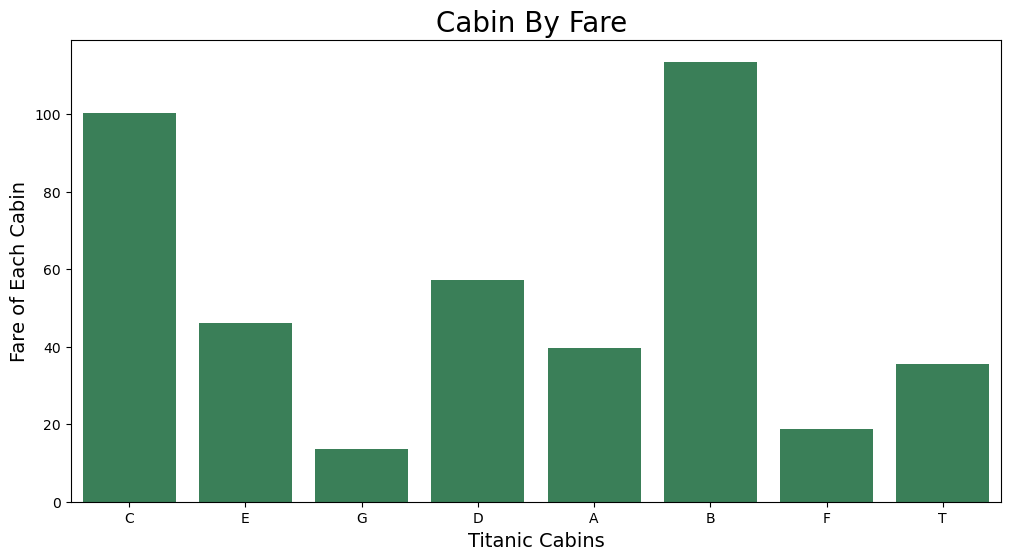

In [27]:
plt.figure(figsize=(12 , 6))
sns.barplot(data=titanic_data[titanic_data["Cabin_missing"] == 0] , x = "Cabin" , y = "Fare" , color="seagreen" ,errorbar=None)
plt.xlabel("Titanic Cabins" , fontsize=14)
plt.ylabel("Fare of Each Cabin" , fontsize=14)
plt.title("Cabin By Fare ", fontsize=20)
plt.show()

In this barplot, we can see that Cabin 'B' had the highest fares, followed by Cabin 'C'. The cheapest cabin is 'G'.

#### 3.2 Fare x Embarked

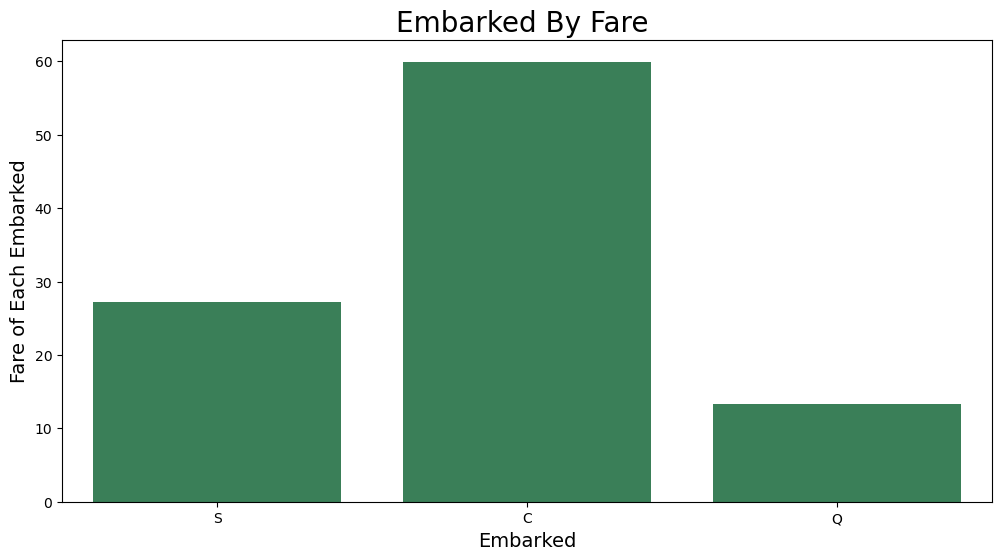

In [28]:
plt.figure(figsize=(12 , 6))
sns.barplot(data=titanic_data, x = "Embarked" , y = "Fare" , color="seagreen" ,errorbar=None)
plt.xlabel("Embarked" , fontsize=14)
plt.ylabel("Fare of Each Embarked" , fontsize=14)
plt.title("Embarked By Fare ", fontsize=20)
plt.show()

In this barplot, we can see that passengers who embarked at C (Cherbourg, France) paid the highest fares, followed by S (Southampton, England), and the lowest fares were from Q (Queenstown, Ireland).

#### 3.3 Fare x survival

C:\Users\OverGame\AppData\Local\Temp\ipykernel_6652\961167081.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = titanic_data.groupby('Fare_Bin')['Survived'].mean().reset_index()


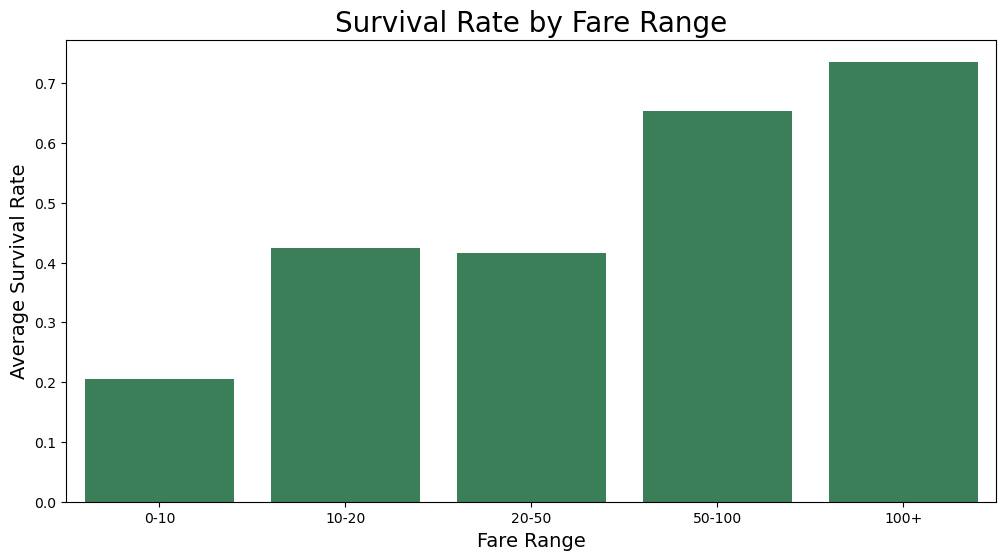

In [29]:
titanic_data['Fare_Bin'] = pd.cut(titanic_data['Fare'], bins=[0,10,20,50,100,600], labels=['0-10','10-20','20-50','50-100','100+']) # creared a bin so i can create a barplot

fare_survival = titanic_data.groupby('Fare_Bin')['Survived'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=fare_survival, x="Fare_Bin", y="Survived", color="seagreen")
plt.xlabel("Fare Range", fontsize=14)
plt.ylabel("Average Survival Rate", fontsize=14)
plt.title("Survival Rate by Fare Range", fontsize=20)
plt.show()

in this barplot we can clearly see that passengers who paid higher Fares had higher chance of survival.

#### 3.4 Fare x Age

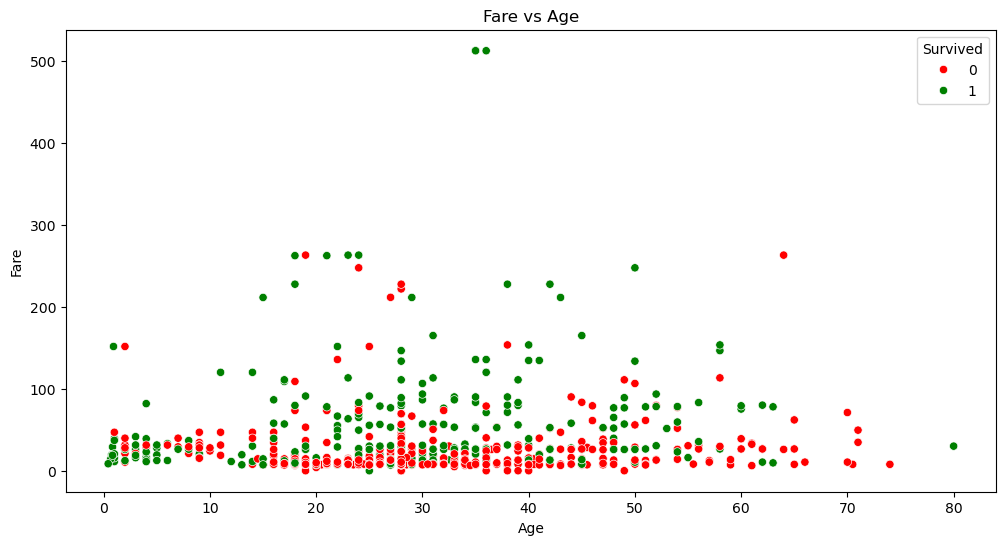

In [30]:

plt.figure(figsize=(12,6))
sns.scatterplot(data=titanic_data, x='Age', y='Fare', hue='Survived', palette=['red','green'])
plt.title('Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In this scatterplot, we can see that older passengers who paid lower fares mostly died, while children aged 0–10, even with low fares, mostly survived.

### 4. Family Analysis

#### 4.0 inspect Family

1.6134585413550788
Mean FamilySize: 0.9046015712682379
family size median : 0.0
Mode: 0


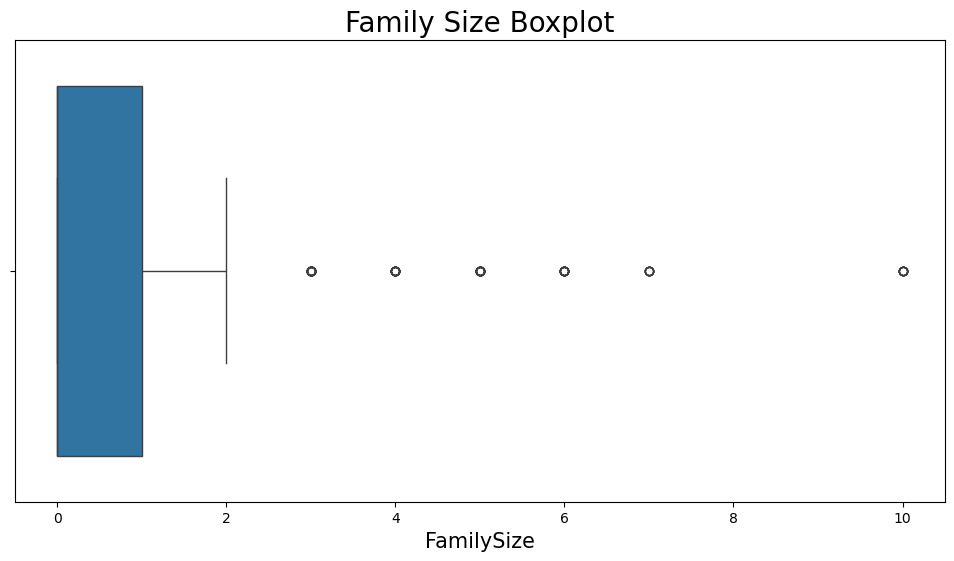

In [31]:
print(titanic_data["FamilySize"].std())

print("Mean FamilySize:", titanic_data['FamilySize'].mean())

print("family size median :" , titanic_data["FamilySize"].median())

print("Mode:", titanic_data['FamilySize'].mode()[0])

plt.figure(figsize= (12,6))
ax = sns.boxplot(data = titanic_data, x= titanic_data["FamilySize"])
ax.set_xlabel('FamilySize',fontsize = 15)
ax.set_title('Family Size Boxplot', fontsize= 20)
plt.ticklabel_format(style='plain', axis='x')
plt.show()


in this boxplot we can see titanic passengers were mostly traveling alone or with just 1 family member (most likely a wife / housband) , we can also see there are some outliers including a passenger with 10 family members !

#### 4.1 Family x Survival

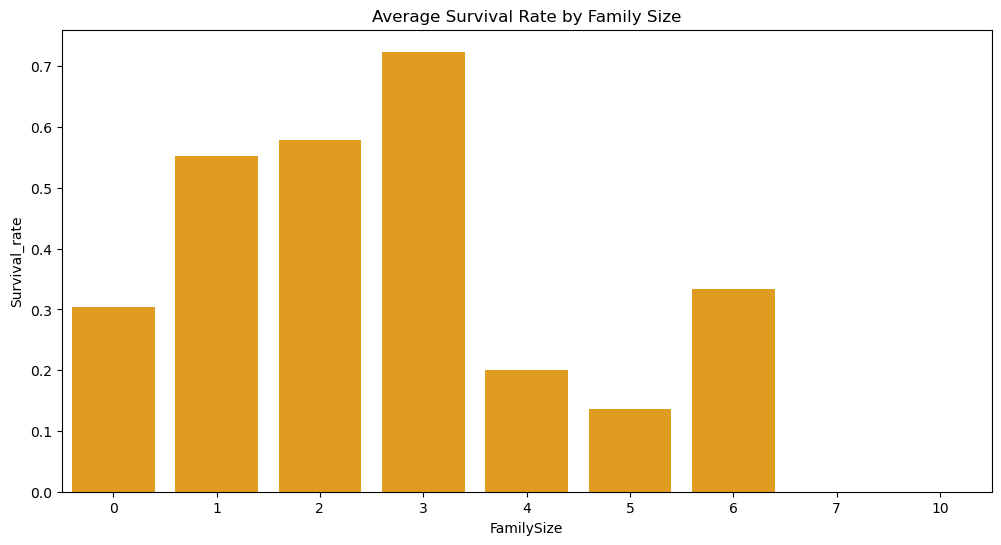

In [32]:
family_survival = titanic_data.groupby('FamilySize')['Survived'].mean().reset_index()

plt.figure(figsize=((12 , 6)))
sns.barplot(data=family_survival , x = 'FamilySize', y = "Survived" , color="orange")
plt.title("Average Survival Rate by Family Size")
plt.xlabel("FamilySize")
plt.ylabel("Survival_rate")
plt.show()

In this barplot, we can see that families with 3 members had the highest survival rate.

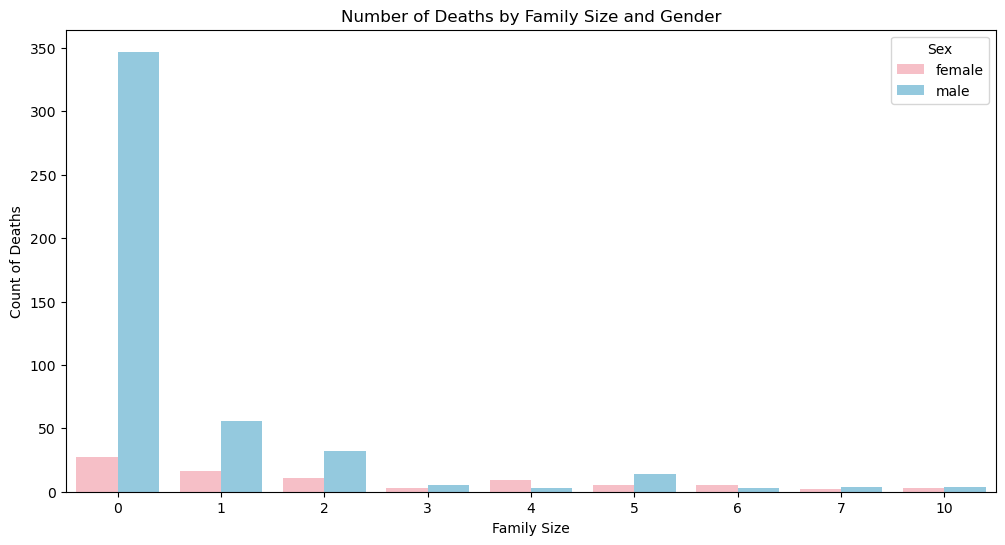

In [33]:
# Checking Which gender died the most in each family size


died_gender = titanic_data[titanic_data['Survived'] == 0].groupby(['FamilySize','Sex'])['Survived'].count().reset_index()


plt.figure(figsize=(12,6))
sns.barplot(data=died_gender, x='FamilySize', y='Survived', hue='Sex' , palette={"male":"skyblue" , "female" : "lightpink" })
plt.title('Number of Deaths by Family Size and Gender')
plt.xlabel('Family Size')
plt.ylabel('Count of Deaths')
plt.show()





In this barplot, we can see that males died more than females in every family size(except 4). Especially, males traveling alone died about 10 times more than females traveling alone.

#### 4.2 Family x Class

C:\Users\OverGame\AppData\Local\Temp\ipykernel_6652\1289106864.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.countplot(data=titanic_data, x='FamilySize', hue='Pclass' , color='orange')


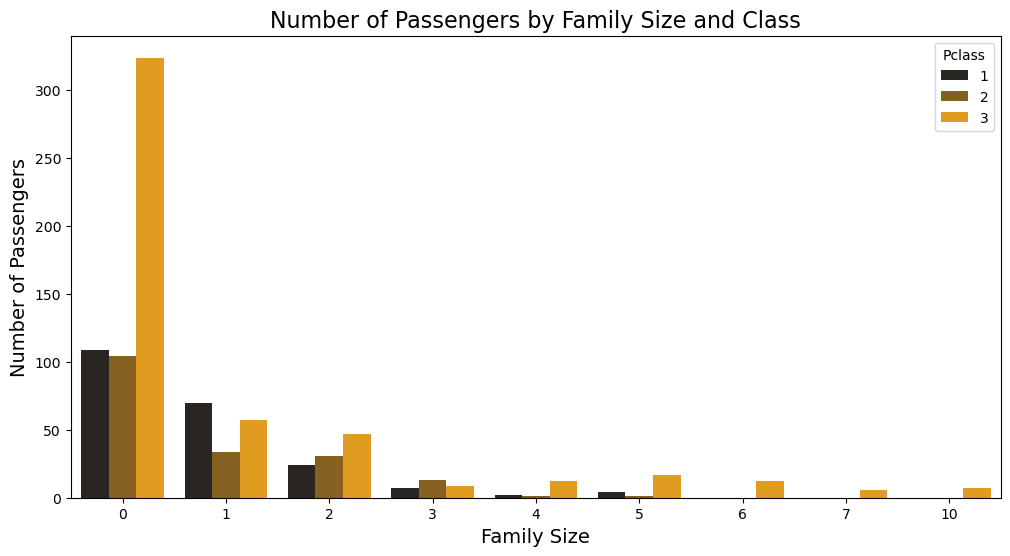

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(data=titanic_data, x='FamilySize', hue='Pclass' , color='orange')
plt.title('Number of Passengers by Family Size and Class', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.show()

In this barplot, we can see that most passengers in each family size traveled in third class, except: Families with 2 members, where first class was most common and families with 3 members, where second class was most common.

### 5. Cabin Analysis

#### 5.0 Cabin inspect 

In [35]:
real_cabins = titanic_data[titanic_data["Cabin_missing"] == 0] # removed missing cabins

# finding most common Cabin
print(real_cabins["Cabin"].mode()[0])
#inspect the Cabin
real_cabins["Cabin"].info()



C
<class 'pandas.core.series.Series'>
Index: 204 entries, 1 to 889
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### 5.1 Cabin x Fare x Count

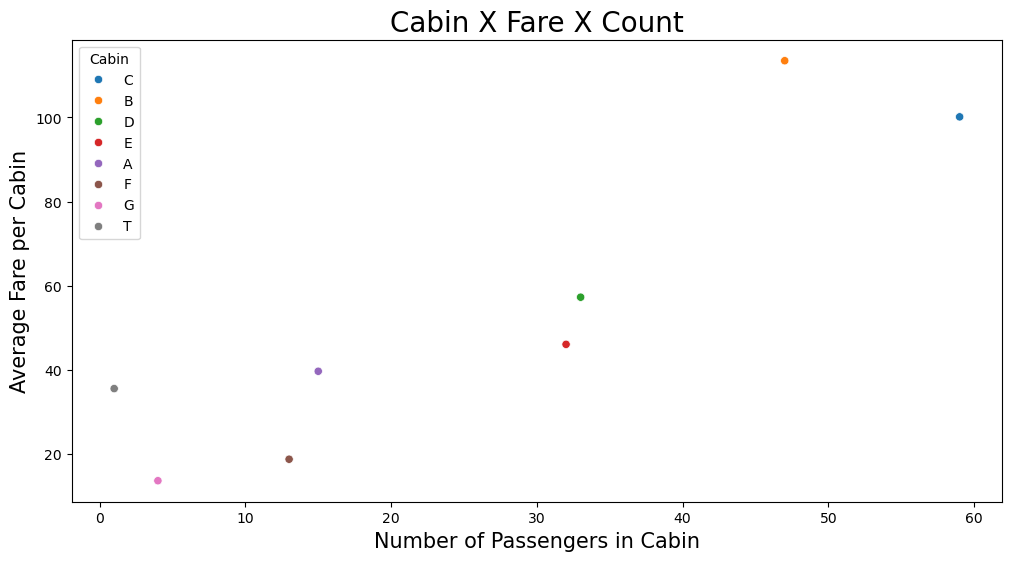

In [36]:
cabin_fare = real_cabins.groupby('Cabin')['Fare'].mean().reset_index()
cabin_count = real_cabins['Cabin'].value_counts().reset_index()
cabin_count.columns = ['Cabin','Count']


cabin_merge = cabin_count.merge(cabin_fare, on='Cabin')


plt.figure(figsize=(12,6))
sns.scatterplot(data=cabin_merge, x='Count', y='Fare', hue='Cabin')
plt.title('Cabin X Fare X Count' , fontsize = 20)
plt.xlabel('Number of Passengers in Cabin' , fontsize = 15)
plt.ylabel('Average Fare per Cabin' , fontsize = 15)

plt.show()

In this scatterplot, we can see that Cabin C was the most common cabin and the second most expensive.
Cabin B was also common and the most expensive.
Cabin G was the cheapest and least common.

#### 5.2 Cabin x Survival

Text(0, 0.5, 'Survival Rate')

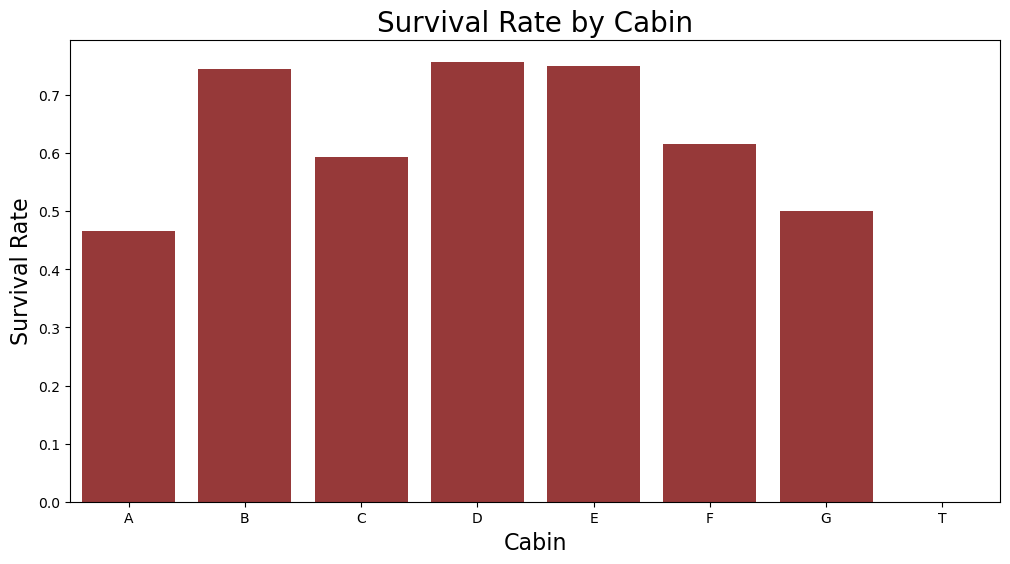

In [37]:
cabin_survival = real_cabins.groupby("Cabin")["Survived"].mean().reset_index()

plt.figure(figsize=(12 , 6))
sns.barplot(data = cabin_survival , x = "Cabin" , y = "Survived" , color="brown")
plt.title("Survival Rate by Cabin" , fontsize = 20)
plt.xlabel("Cabin" , fontsize = 16)
plt.ylabel("Survival Rate" , fontsize = 16)



In this barplot, we can see that Cabins B, D, and F had the highest survival rates, while Cabin A had the lowest survival rate.

#### 5.3 Cabin x Class

Text(0, 0.5, 'Class')

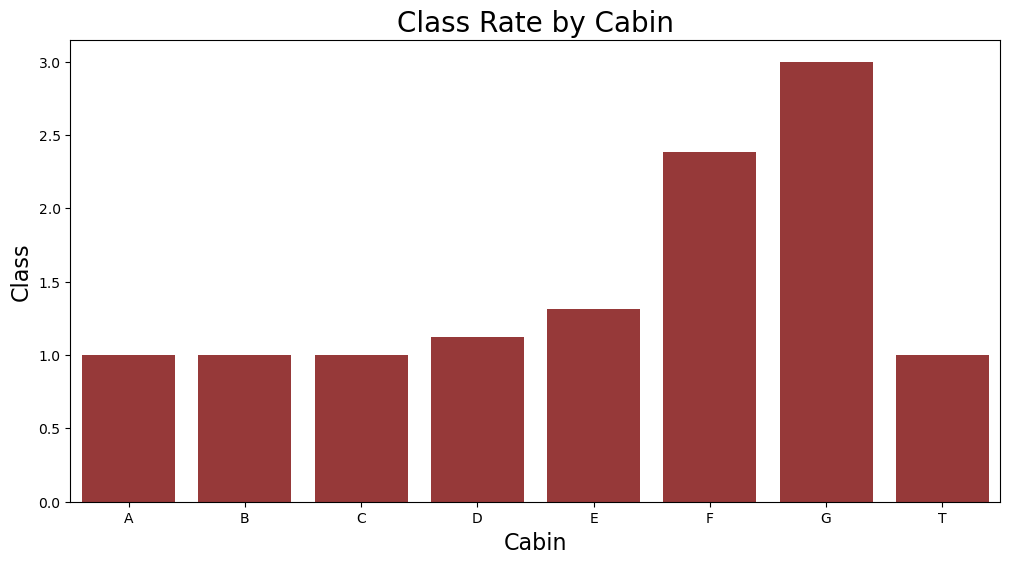

In [38]:
cabin_Class = real_cabins.groupby("Cabin")["Pclass"].mean().reset_index()

plt.figure(figsize=(12 , 6))
sns.barplot(data = cabin_Class , x = "Cabin" , y = "Pclass" , color="brown")
plt.title("Class Rate by Cabin" , fontsize = 20)
plt.xlabel("Cabin" , fontsize = 16)
plt.ylabel("Class" , fontsize = 16)



Cabins A, B, C, T were all first class

Cabins D and E had first and second class passengers

Cabin F had second and third class passengers

Cabin G was third class

### 6. Fun Facts

#### 6.1 Most Expensive Tickets 

In [39]:
# who had the most expensive ticket ?
top_fares = titanic_data[['Name', 'Fare', 'Survived']].sort_values(by='Fare', ascending=False).head(3)
top_fares




,Name,Fare,Survived
737,"Lesurer, Mr. Gustave J",512.3292,1
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,1
258,"Ward, Miss. Anna",512.3292,1


#### 6.2 Oldest and youngest passenger

In [40]:
oldest = titanic_data[['Name' , 'Age' , 'Survived']].sort_values(by="Age" , ascending=False).head(1)
oldest

youngest = oldest = titanic_data[['Name' , 'Age' , 'Survived' , ]].sort_values(by="Age" , ascending=True).head(1)
youngest

,Name,Age,Survived
803,"Thomas, Master. Assad Alexander",0.42,1


#### 6.3 Most Family members Abroad 

In [41]:
most_FamilySize = titanic_data[['Name' , 'FamilySize' , 'Survived']].sort_values(by="FamilySize" , ascending=False).head(7)
most_FamilySize

,Name,FamilySize,Survived
846,"Sage, Mr. Douglas Bullen",10,0
324,"Sage, Mr. George John Jr",10,0
792,"Sage, Miss. Stella Anna",10,0
863,"Sage, Miss. Dorothy Edith ""Dolly""",10,0
159,"Sage, Master. Thomas Henry",10,0
201,"Sage, Mr. Frederick",10,0
180,"Sage, Miss. Constance Gladys",10,0


#### 6.4 Most repeated Name and Last Name 

In [42]:
titanic_data['FirstName'].value_counts().head(5)
titanic_data['LastName'].value_counts().head(5)


LastName
Mr. James       7
Mr. John        7
Miss. Mary      6
Mr. William     6
Miss. Bertha    4
Name: count, dtype: int64

#### 6.5 The class That had the Highest Survival Rate

In [43]:
class_survival = titanic_data.groupby('Pclass')['Survived'].mean().reset_index()
class_survival

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Results فارسی 📝

#### Age

در این قسمت مشاهده کردیم که بازه سنی از 0 سال تا 80 سال و میانگین بین 20 تا 40 سال بود. افراد زیر 20 سال به خصوص افراد 0 تا 10 سال بیشترین تعداد اعضای خانواده رو داشتن. کودکان بیشترین احتمال زنده بودن رو داشتن ، به خصوص کودکان زیر 10 سال. گرونترین بلیط ها هم متعلق به افراد 50 تا 70 سال بود.

#### Sex

در این قسمت مشاهده کردیم بیشتر افراد مرد ها بودند ، زن ها بلیط های گران تری داشتند و احتمال زنده موندن بیشتری هم نسبت به مرد ها داشتند. اعضای خانواده خانم ها در کشتی به نسبت مرد ها بیشتر بود ، همچنین کلاس و هزینه بلیط انها نیز از مردان بالا تر بود.

#### Fare

در این قسمت مشاهده کردیم که میانگین هزینه بلیط بین 10 تا 40 دلار بود. کابین های بی و سی در میانگین بیشترین قیمت بلیط رو داشتند . کسانی که مقصد انها فرانسه بود بلیط گران تری داشتند ، بعد انها انگلیس و در نهایت ایرلند.هرچه قیمت بلیط پرداختی بالاتر بود شانس زنده ماندن هم بیشتر میشد ، به جز کودکان که حتی با بلیط ارزان شانس زنده ماندن بالایی داشتند.

#### Family

در این قسمت مشاهده کردیم که میانگین اعضای خانواده حاضر در کشتی 1 نفر بوده است . خانواده هایی که 3 عضو داشتند بیشترین احتمال زنده ماندن را داشتند. در تمامی خانواده ها (بجز خانواده 4 نفره) مرد ها احتمال زنده ماندنشان بسیار کمتر بود. در تمامی خانواده ها میانگین کلاس ، کلاس 3 بوده است بجز خانواده های 2 نفره که میانگینشان کلاس 1 بود و خانواده 3 نفره که میانگینشان کلاس 2 بود.

#### Cabin


در این قسمت مشاهده کردیم که کابین سی بیشترین مسافر را داشت ، در حالی که از نظر قیمت دومین کابین گران بود. همچنین کابین بی که گرانترین قیمت را داشت از نظر مسافر رتبه دوم را داشت . کابین جی هم ارزان ترین و هم کمترین مسافر را داشت. کابین های بی دی و ای بیشترین امار زنده ماندن و کابین آ پایین ترین امار زنده ماندن را داشت . کابین های آ و بی و سی و تی کلاس اول ، کابین های بی و ای هم کلاس اول و هم کلاس دوم و کابین اف هم کلاس دوم و هم کلاس سوم و کابین جی کلاس سوم را به خود تعلق داده بود

## Results English 📝

### Age

In this section, we can see that ages ranged from 0 to 80, with most passengers between 20 and 40. People under 20—especially those aged 0 to 10—had the largest family sizes. Children had the highest chances of survival, particularly those under 10. The most expensive tickets were held by passengers aged 50 to 70.


### Sex

In this section, we observed that most passengers were men, but women tended to have more expensive tickets and higher chances of survival compared to men. Female passengers also had larger family sizes on board than men, and their class and ticket costs were generally higher.


### Fare

In this section, we observed that the average ticket price ranged from $10 to $40. Cabins B and C had the highest average ticket prices. Passengers whose destination was France had more expensive tickets, followed by those going to England and then Ireland. In general, the higher the ticket price, the greater the chances of survival, except for children, who had high survival rates even with cheaper tickets.


### Family

In this section, we observed that the average family size on board was 1. Families with 3 members had the highest chances of survival. In all family sizes (except for 4-member families), men had significantly lower survival rates. Most families were in class 3, except for 2-member families, which averaged class 1, and 3-member families, which averaged class 2.


### Cabin

In this section, we observed that Cabin C had the most passengers, while being the second most expensive cabin. Cabin B, which had the highest ticket prices, ranked second in terms of passenger count. Cabin G had both the lowest price and the fewest passengers. Cabins B, D, and E had the highest survival rates, while Cabin A had the lowest. Cabins A, B, C, and T were first class; Cabins D and E included both first and second class; Cabin F included second and third class; and Cabin G was third class.
